# Eploratory Data Anlysis and Classification Using SVM
In this Notebook I'm going to use # Tree Servival Prediction# dataset to perform exploratory Data Analysis and Claafication tasks using Support Vector Machine.
The disription of the Dataset can be found using the following link:
https://www.kaggle.com/datasets/yekenot/tree-survival-prediction/data

We will cover the basic part for beginner:
*   Importing Libraries
*   Performing EDA
*   Data cleaning
*   Classification using Support Vector Machine

For more details about Support Vector Machine, how it works and configuration I will recommend reading following the Notebook:
https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#4.-SVM-Scikit-Learn-libraries-






#Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data

In [2]:
df= pd.read_csv("/content/Tree_Data.csv")

#Data exploration

In [3]:
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [4]:
df.shape

(2783, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [6]:
df.describe()

,No,Plot,Light_ISF,Core,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event
count,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,1283.00000,2783.000000,2783.000000,2783.000000,2783.000000,2783.000000,2782.000000
mean,3914.513834,9.561624,0.085707,2016.648940,20.553069,26.47675,1.933105,15.759792,14.219641,15.282070,53.487244,0.570453
std,2253.515063,5.203659,0.025638,0.477387,12.309587,16.63689,1.969842,6.779607,4.298271,9.166555,32.082942,0.495100
min,3.000000,1.000000,0.032000,2016.000000,0.000000,0.00000,-1.350000,2.230000,4.300000,4.000000,14.000000,0.000000
25%,1971.000000,5.000000,0.066000,2016.000000,13.400000,13.78000,0.170000,10.355000,11.605000,7.000000,24.500000,0.000000
50%,3932.000000,10.000000,0.082000,2017.000000,18.000000,27.72000,0.750000,14.040000,12.660000,13.000000,45.500000,1.000000
75%,5879.000000,14.000000,0.100000,2017.000000,24.445000,35.71000,3.780000,21.115000,17.275000,18.000000,63.000000,1.000000
max,7772.000000,18.000000,0.161000,2017.000000,100.000000,87.50000,6.100000,32.770000,29.450000,33.000000,115.500000,1.000000


In [7]:
df.columns

Index(['No', 'Plot', 'Subplot', 'Species', 'Light_ISF', 'Light_Cat', 'Core',
       'Soil', 'Adult', 'Sterile', 'Conspecific', 'Myco', 'SoilMyco',
       'PlantDate', 'AMF', 'EMF', 'Phenolics', 'Lignin', 'NSC', 'Census',
       'Time', 'Event', 'Harvest', 'Alive'],
      dtype='object')

In [8]:
#Drop all columns that have object data type because we want to work the columns wich contains number only
dfnew = df.drop(['Subplot','Species','Light_Cat','Soil','Adult','Sterile','Conspecific','Myco','SoilMyco','PlantDate','Phenolics','Lignin','Harvest','Alive'], axis=1)

In [9]:
dfnew.head()

,No,Plot,Light_ISF,Core,AMF,EMF,NSC,Census,Time,Event
0,126,1,0.106,2017,22.00,NaN,12.15,4,14.0,1.0
1,11,1,0.106,2017,15.82,31.07,19.29,33,115.5,0.0
2,12,1,0.106,2017,24.45,28.19,15.01,18,63.0,1.0
3,2823,7,0.080,2016,22.23,NaN,12.36,4,14.0,1.0
4,5679,14,0.060,2017,21.15,NaN,11.20,4,14.0,1.0


In [10]:
#Again, droping the 'No' and "Plot" because they dont have any effect to our classification
data = dfnew.drop(['No','Plot'], axis=1)

In [11]:
data.head()

,Light_ISF,Core,AMF,EMF,NSC,Census,Time,Event
0,0.106,2017,22.00,NaN,12.15,4,14.0,1.0
1,0.106,2017,15.82,31.07,19.29,33,115.5,0.0
2,0.106,2017,24.45,28.19,15.01,18,63.0,1.0
3,0.080,2016,22.23,NaN,12.36,4,14.0,1.0
4,0.060,2017,21.15,NaN,11.20,4,14.0,1.0


#Now cleaning the data and checking the distribution of the varibles

In [12]:
data.columns

Index(['Light_ISF', 'Core', 'AMF', 'EMF', 'NSC', 'Census', 'Time', 'Event'], dtype='object')

In [13]:
#Looking the shape of the dataset
data.shape #As it can be seen from the output, the data has a 2783 rows and 8 columns

(2783, 8)

In [14]:
#Checking Null values for each column
data.isnull().sum()  #Two columns found to have null values. Column EMF and Event which is our target variable.
                     # We will fill the missing values on the column EMF by the mean value of the column

Light_ISF       0
Core            0
AMF             0
EMF          1500
NSC             0
Census          0
Time            0
Event           1
dtype: int64

In [15]:
#Filling the missing values of column EMF by the mean value of the column
data['EMF'].fillna(int(data['EMF'].mean()), inplace=True)

In [16]:
data.isnull().sum() # Now can be seen from the output the EMF column is now doesnot contains missing value
                    #For the colmn Event, We will drop all Na values

Light_ISF    0
Core         0
AMF          0
EMF          0
NSC          0
Census       0
Time         0
Event        1
dtype: int64

In [17]:
#Drop all Null values from the dataset since the remaining Null values from column Event only
data_new=data.dropna()

In [18]:
#Resetting the index after drop the values
data_new = data_new.reset_index(drop=True)

In [19]:
data_new.isnull().sum() # Now we dont have missing values in our dataset

Light_ISF    0
Core         0
AMF          0
EMF          0
NSC          0
Census       0
Time         0
Event        0
dtype: int64

In [20]:
#Checking the distribution of the classes:
#The Event used for survival analysis to indicate status of each individual seedling at a given time which means:
#0 = harvested or experiment ended
#1 = dead

data['Event'].value_counts()

1.0    1587
0.0    1195
Name: Event, dtype: int64

In [21]:
data_new.shape

(2782, 8)

In [23]:
#Looking the distribution of the class in percentage wise
# 1 class is 57% while 0 class is 42.9%
data_new['Event'].value_counts()/np.float64(len(data))

1.0    0.570248
0.0    0.429393
Name: Event, dtype: float64

Text(0, 0.5, 'Time')

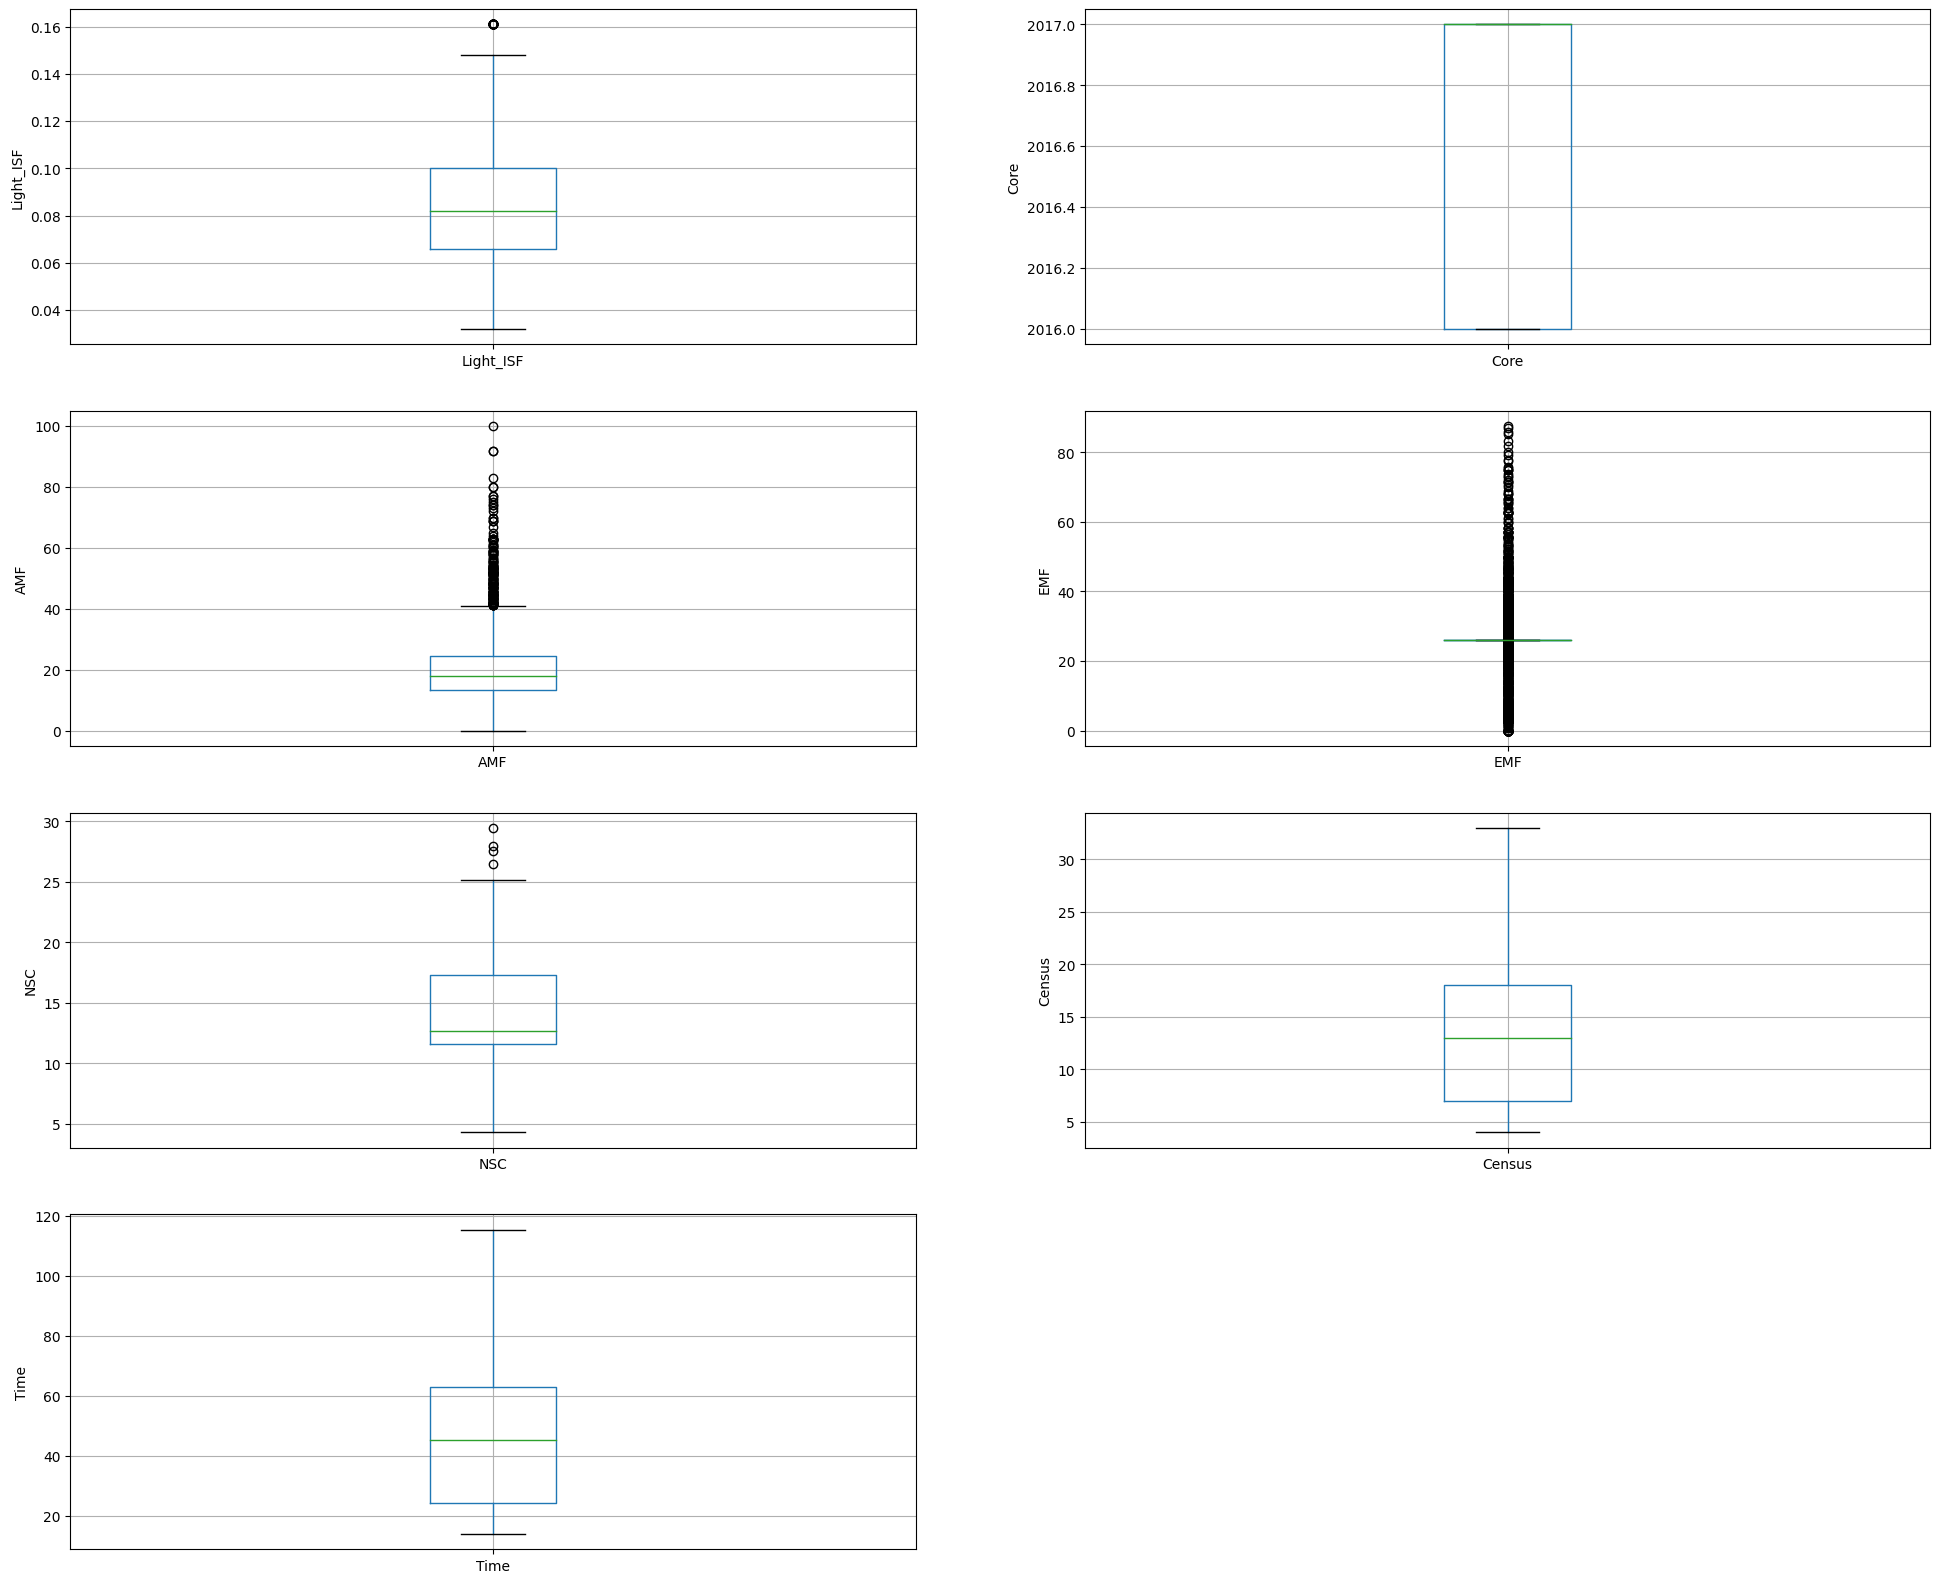

In [24]:
# Checking the outliers using box plot

plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = data_new.boxplot(column='Light_ISF')
fig.set_title('')
fig.set_ylabel('Light_ISF')

plt.subplot(4, 2, 2)
fig = data_new.boxplot(column='Core')
fig.set_title('')
fig.set_ylabel('Core')

plt.subplot(4, 2, 3)
fig = data_new.boxplot(column='AMF')
fig.set_title('')
fig.set_ylabel('AMF')

plt.subplot(4, 2, 4)
fig = data_new.boxplot(column='EMF')
fig.set_title('')
fig.set_ylabel('EMF')

plt.subplot(4, 2, 5)
fig = data_new.boxplot(column='NSC')
fig.set_title('')
fig.set_ylabel('NSC')

plt.subplot(4, 2, 6)
fig = data_new.boxplot(column='Census')
fig.set_title('')
fig.set_ylabel('Census')

plt.subplot(4, 2, 7)
fig = data_new.boxplot(column='Time')
fig.set_title('')
fig.set_ylabel('Time')

Text(0, 0.5, 'Number of seedling')

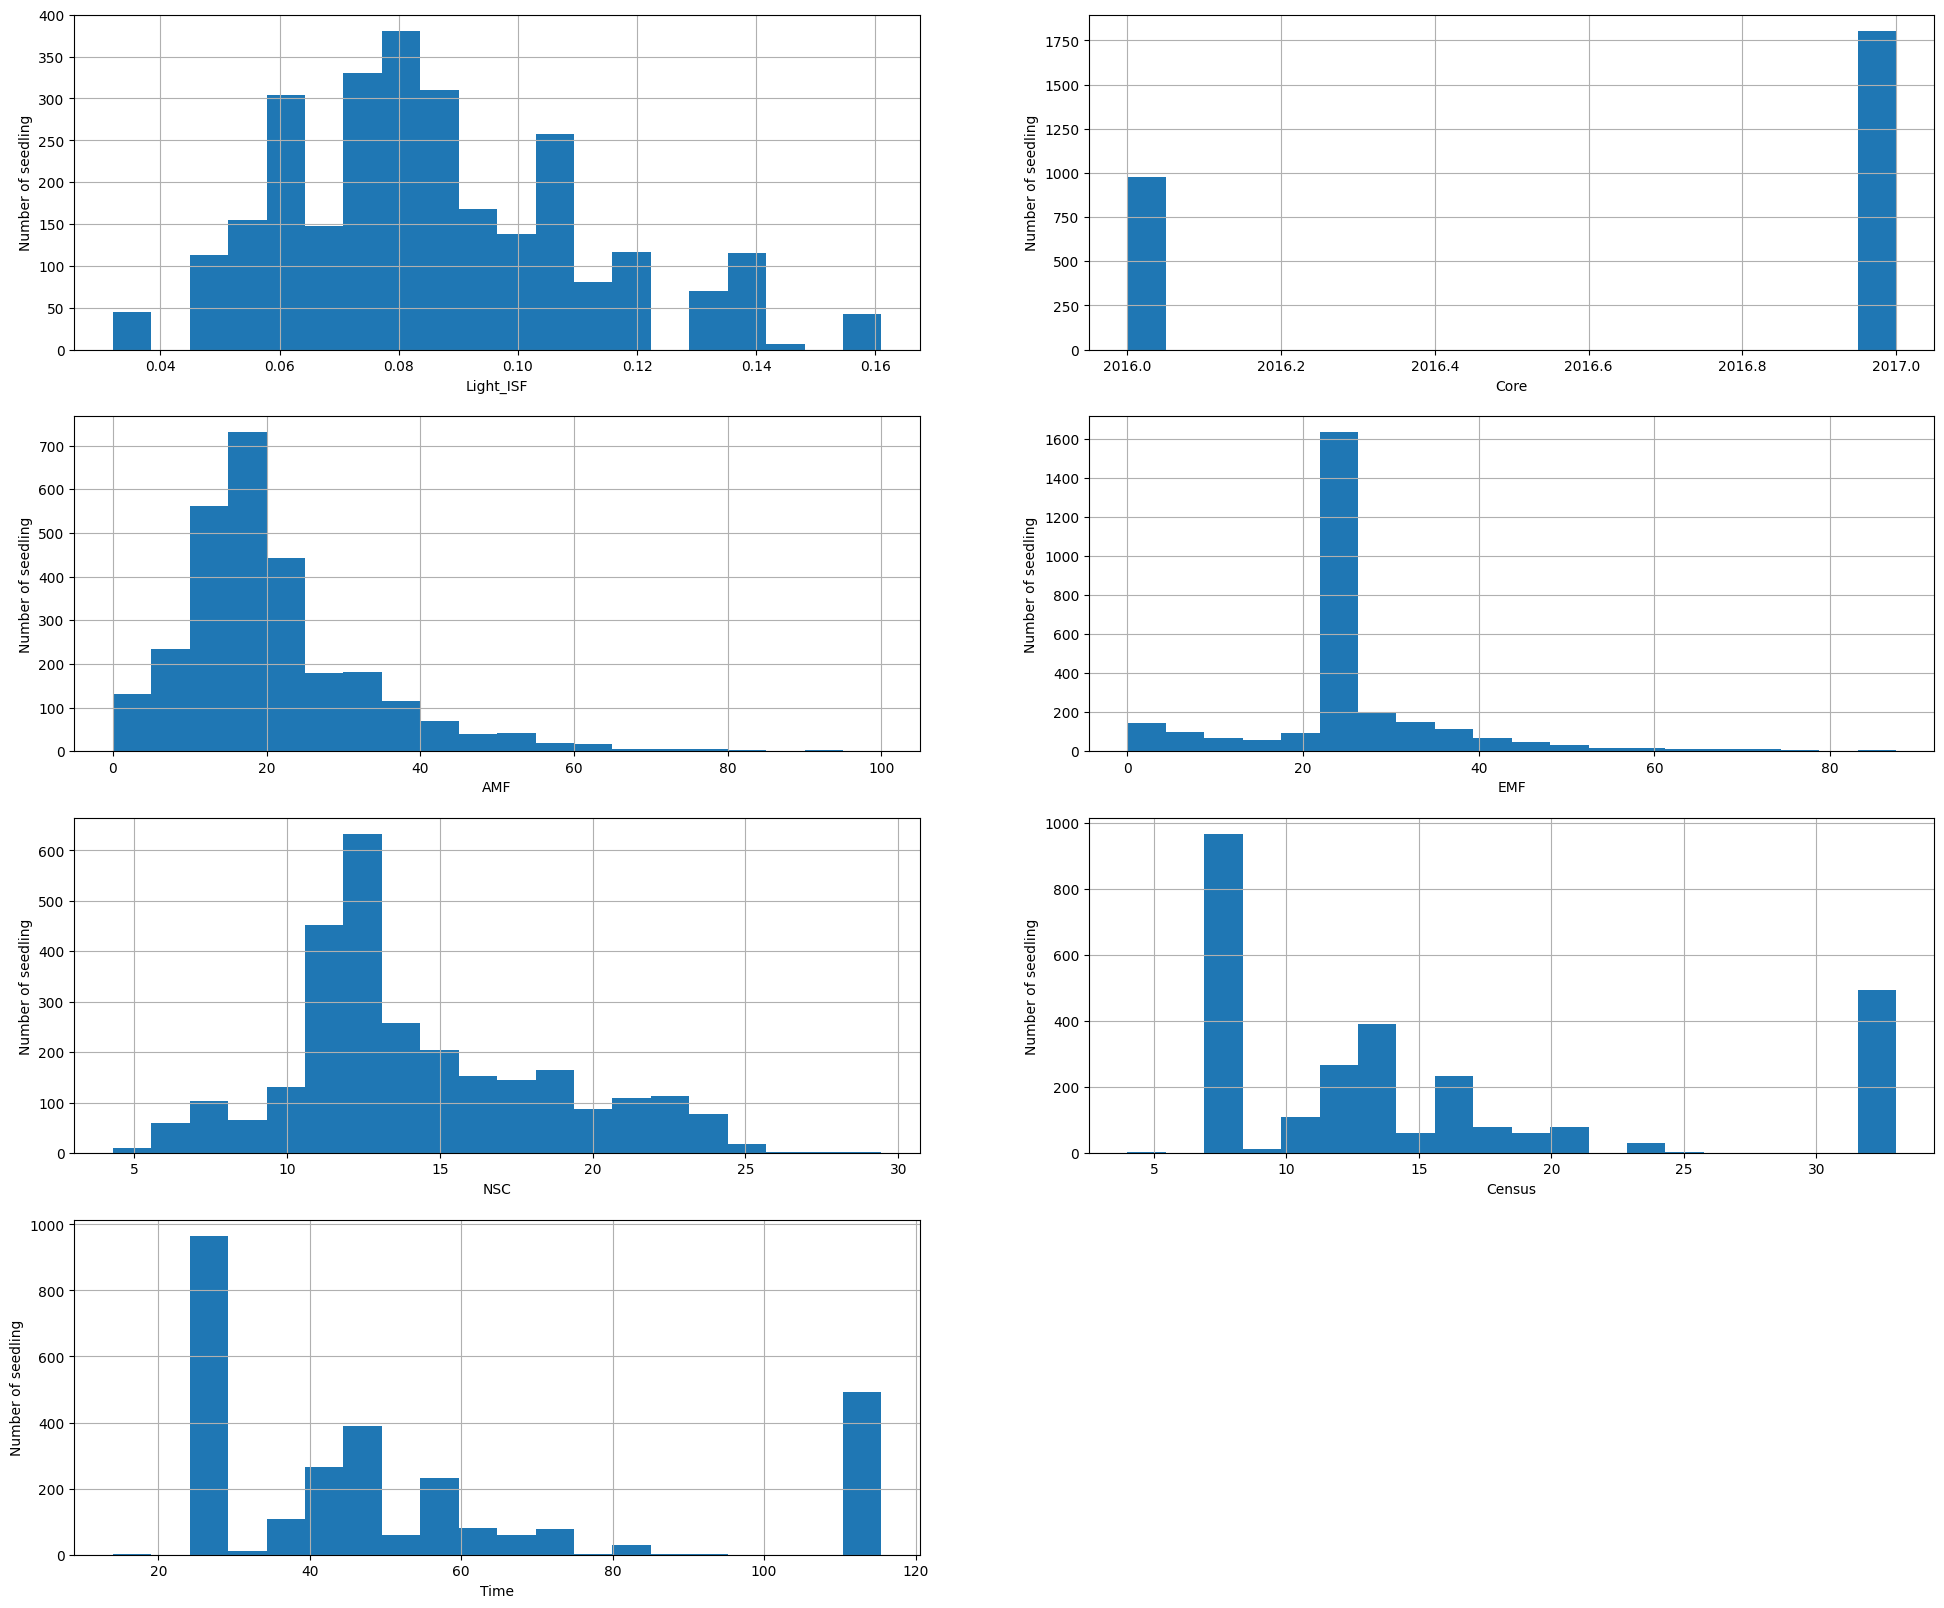

In [25]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = data_new['Light_ISF'].hist(bins=20)
fig.set_xlabel('Light_ISF')
fig.set_ylabel('Number of seedling')

plt.subplot(4, 2, 2)
fig = data_new['Core'].hist(bins=20)
fig.set_xlabel('Core')
fig.set_ylabel('Number of seedling')

plt.subplot(4, 2, 3)
fig = data_new['AMF'].hist(bins=20)
fig.set_xlabel('AMF')
fig.set_ylabel('Number of seedling')

plt.subplot(4, 2, 4)
fig = data_new['EMF'].hist(bins=20)
fig.set_xlabel('EMF')
fig.set_ylabel('Number of seedling')

plt.subplot(4, 2, 5)
fig = data_new['NSC'].hist(bins=20)
fig.set_xlabel('NSC')
fig.set_ylabel('Number of seedling')

plt.subplot(4, 2, 6)
fig = data_new['Census'].hist(bins=20)
fig.set_xlabel('Census')
fig.set_ylabel('Number of seedling')

plt.subplot(4, 2, 7)
fig = data_new['Time'].hist(bins=20)
fig.set_xlabel('Time')
fig.set_ylabel('Number of seedling')

# Summary of the final dataset

*   The dataset contains 8 columns (7 are X columns and 1 is Y column)
*   No missing values
*   Some of the columns have a outliers
*   The distribution of the columns are mixed (Skewed and normal)
*   The ration of classes are (1=57% and 0=42.9%)









#Classification Using Support Vector Machine

In [28]:
#Importing necessary libraries to perform classification using SVM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
#Droping the taget column
X = data_new.drop(['Event'], axis=1)
y = data_new['Event']

In [29]:
#Splitting the dataset into training and testing
# We will split the dataset into ration of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# check the shape of Training and testing sets
X_train.shape, X_test.shape

((2225, 7), (557, 7))

In [31]:
cols = X_train.columns

In [32]:
#Feature Scaling using standard Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [34]:
#Looking at the statistical summary of our scaled dataset
X_train.describe()

,Light_ISF,Core,AMF,EMF,NSC,Census,Time
count,2.225000e+03,2.225000e+03,2.225000e+03,2.225000e+03,2.225000e+03,2.225000e+03,2.225000e+03
mean,5.428866e-17,1.492491e-13,-2.746367e-16,-6.386901e-18,-5.476768e-16,6.386901e-18,1.596725e-17
std,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00
min,-2.087558e+00,-1.366480e+00,-1.665844e+00,-2.320119e+00,-2.332001e+00,-1.226314e+00,-1.226314e+00
25%,-7.656774e-01,-1.366480e+00,-5.825301e-01,-2.252358e-02,-6.098905e-01,-8.963672e-01,-8.963672e-01
50%,-1.436158e-01,7.318072e-01,-1.997050e-01,-2.252358e-02,-3.675717e-01,-2.364741e-01,-2.364741e-01
75%,6.728400e-01,7.318072e-01,3.191453e-01,-2.252358e-02,7.052182e-01,3.134369e-01,3.134369e-01
max,2.927813e+00,7.318072e-01,6.479372e+00,5.412173e+00,3.231921e+00,1.963170e+00,1.963170e+00


Now let perform SVM classification using default configuration of SVM
# For further testing and exploring the different configuration of Hyperparameters and Kernel Please visit the following Notebook, the author expained it verry well:
https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#4.-SVM-Scikit-Learn-libraries-


In [35]:
# instantiate classifier with default hyperparameters
svc=SVC()

In [36]:
# fit classifier to training set
svc.fit(X_train,y_train)

SVC()

In [37]:
# Test the Model on test set
y_pred=svc.predict(X_test)

In [39]:
#Calculating accuracy Score
print('Model accuracy score is : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score is : 0.9425


<Axes: >

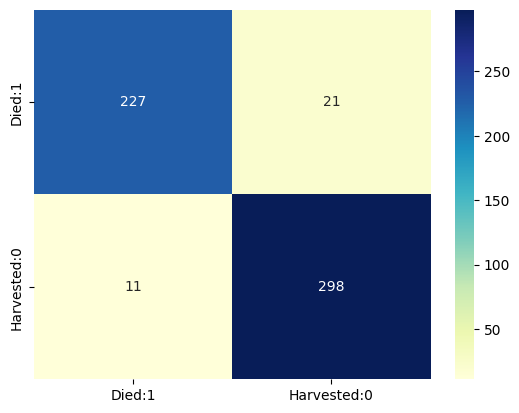

In [44]:
# visualize confusion matrix with seaborn heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Died:1', 'Harvested:0'],
                                 index=['Died:1', 'Harvested:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [45]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       248
         1.0       0.93      0.96      0.95       309

    accuracy                           0.94       557
   macro avg       0.94      0.94      0.94       557
weighted avg       0.94      0.94      0.94       557

